<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Train-a-bi-LSTM-to-predict-short-entities" data-toc-modified-id="Train-a-bi-LSTM-to-predict-short-entities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Train a bi-LSTM to predict short entities<br></a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up</a></span><ul class="toc-item"><li><span><a href="#Import-necessry-packages" data-toc-modified-id="Import-necessry-packages-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Import necessry packages</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Load-in-data" data-toc-modified-id="Load-in-data-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Load in data</a></span><ul class="toc-item"><li><span><a href="#Read-in-the-BioSample-annotations-and-build-dataframe" data-toc-modified-id="Read-in-the-BioSample-annotations-and-build-dataframe-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Read in the BioSample annotations and build dataframe</a></span></li><li><span><a href="#Read-in-metadata-on-BioSample-entries-that-will-allow-us-to-cap-on-study" data-toc-modified-id="Read-in-metadata-on-BioSample-entries-that-will-allow-us-to-cap-on-study-1.1.3.2"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Read in metadata on BioSample entries that will allow us to cap on study</a></span></li><li><span><a href="#Read-in-embeddings" data-toc-modified-id="Read-in-embeddings-1.1.3.3"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>Read in embeddings</a></span></li><li><span><a href="#Import-merging-of-entities-from-file" data-toc-modified-id="Import-merging-of-entities-from-file-1.1.3.4"><span class="toc-item-num">1.1.3.4&nbsp;&nbsp;</span>Import merging of entities from file</a></span></li></ul></li></ul></li><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data processing</a></span><ul class="toc-item"><li><span><a href="#Filter-training-set" data-toc-modified-id="Filter-training-set-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Filter training set</a></span><ul class="toc-item"><li><span><a href="#Filter-out-non-valid-attributes" data-toc-modified-id="Filter-out-non-valid-attributes-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Filter out non-valid attributes</a></span></li><li><span><a href="#Cap-at-100-samples-per-study-to-avoid-study-bias" data-toc-modified-id="Cap-at-100-samples-per-study-to-avoid-study-bias-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Cap at 100 samples per study to avoid study bias</a></span></li><li><span><a href="#Filter-out-unwanted-training-examples-and-replace-all-white-space-with-'-'" data-toc-modified-id="Filter-out-unwanted-training-examples-and-replace-all-white-space-with-'-'-1.2.1.3"><span class="toc-item-num">1.2.1.3&nbsp;&nbsp;</span>Filter out unwanted training examples and replace all white space with ' '</a></span></li><li><span><a href="#Take-only-values-between-length-2-and-7" data-toc-modified-id="Take-only-values-between-length-2-and-7-1.2.1.4"><span class="toc-item-num">1.2.1.4&nbsp;&nbsp;</span>Take only values between length 2 and 7</a></span></li><li><span><a href="#Filter-out-test-set-examples" data-toc-modified-id="Filter-out-test-set-examples-1.2.1.5"><span class="toc-item-num">1.2.1.5&nbsp;&nbsp;</span>Filter out test set examples</a></span></li><li><span><a href="#Replace-whitespace-with-'-'" data-toc-modified-id="Replace-whitespace-with-'-'-1.2.1.6"><span class="toc-item-num">1.2.1.6&nbsp;&nbsp;</span>Replace whitespace with ' '</a></span></li><li><span><a href="#Final-dataset" data-toc-modified-id="Final-dataset-1.2.1.7"><span class="toc-item-num">1.2.1.7&nbsp;&nbsp;</span>Final dataset</a></span></li></ul></li><li><span><a href="#Train/val-split" data-toc-modified-id="Train/val-split-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Train/val split</a></span><ul class="toc-item"><li><span><a href="#Start-by-pulling-out-only-samples-that-are-in-our-dataset-from-technical-metadata,-that-has-studies-in-it" data-toc-modified-id="Start-by-pulling-out-only-samples-that-are-in-our-dataset-from-technical-metadata,-that-has-studies-in-it-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Start by pulling out only samples that are in our dataset from technical metadata, that has studies in it</a></span></li><li><span><a href="#Get-unique-studies" data-toc-modified-id="Get-unique-studies-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>Get unique studies</a></span></li><li><span><a href="#Select-studies-to-use-to-train-and-validate" data-toc-modified-id="Select-studies-to-use-to-train-and-validate-1.2.2.3"><span class="toc-item-num">1.2.2.3&nbsp;&nbsp;</span>Select studies to use to train and validate</a></span></li></ul></li><li><span><a href="#Generate-training-and-val-dataframes" data-toc-modified-id="Generate-training-and-val-dataframes-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Generate training and val dataframes</a></span><ul class="toc-item"><li><span><a href="#Training-set" data-toc-modified-id="Training-set-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Training set</a></span></li><li><span><a href="#Validation-set" data-toc-modified-id="Validation-set-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Validation set</a></span></li></ul></li><li><span><a href="#Supp.-Figure-2A-Class-balance" data-toc-modified-id="Supp.-Figure-2A-Class-balance-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span><font color="red">Supp. Figure 2A</font> Class balance</a></span></li></ul></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Train the model</a></span><ul class="toc-item"><li><span><a href="#Model-set-up" data-toc-modified-id="Model-set-up-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Model set-up</a></span></li></ul></li></ul></li></ul></div>

# Train a bi-LSTM to predict short entities<br>
Adam Klie<br>
11/17/2019<br>
Script to train a model based on merged entities passed in and training set decided on

## Set up

### Import necessry packages

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import spacy
import tensorflow
import keras
from keras.models import Sequential, model_from_json, load_model
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from sklearn import preprocessing, metrics

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

/cellar/users/aklie/opt/miniconda3/envs/PredictMEE/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc si

### Helper functions

In [2]:
# Function to build LSTM model.
# embeddings: an mxn matrix of word embeddings with m words and n features for each word (this case is 5443656 x 200)
# shape: parameter split into number of hidden units, 
def compile_lstm(embeddings, shape, settings):  # function definition
    model = Sequential()
    model.add(Embedding(embeddings.shape[0],
                        embeddings.shape[1],
                        input_length=shape['max_length'],
                        trainable=False,
                        weights=[embeddings],
                        mask_zero=True))
    
    #the same dense layer is first applied extract the most useful info from embedding layers
    model.add(TimeDistributed(Dense(shape['nr_hidden'], use_bias=False)))
    model.add(Bidirectional(LSTM(shape['nr_hidden'],
                                 recurrent_dropout=settings['dropout'],
                                 dropout=settings['dropout'])))
    model.add(Dense(shape['nr_class'], activation='sigmoid'))
    model.compile(optimizer=Adam(lr=settings['lr']), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def get_features(docs, max_length):
    docs = list(docs)
    Xs = np.zeros((len(docs), max_length), dtype='int32')
    for i, doc in tqdm(enumerate(docs),total=len(docs)):
        j = 0
        for token in doc:
            ##rever to word vector
            vector_id = token.vocab.vectors.find(key=token.orth)
            if vector_id >= 0:
                Xs[i, j] = vector_id
            else:
                Xs[i, j] = 0
            j += 1
            if j >= max_length:
                break
    return Xs

In [3]:
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 600 
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 18
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

rcParams['axes.labelsize'] = 36
rcParams['ytick.labelsize'] = 30
rcParams['xtick.labelsize'] = 30

### Load in data

#### Read in the BioSample annotations and build dataframe

In [4]:
# Read in pandas Series from file
qiita_dir = "../data/qiita/allQiita.pickle"
allQiita = pd.read_pickle(qiita_dir)

ModuleNotFoundError: No module named 'pandas.core.internals.managers'; 'pandas.core.internals' is not a package

#### Read in metadata on BioSample entries that will allow us to cap on study

In [4]:
sra_dump_pickle_dir = '../data/sra_dump.pickle'
technical_meta_data_df = pd.read_pickle(sra_dump_pickle_dir)

#### Read in embeddings

In [5]:
nlp = spacy.load('../data/wikipedia-pubmed-and-PMC-w2v')

/cellar/users/aklie/miniconda3/envs/deep_nlp_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/miniconda3/envs/deep_nlp_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


#### Import merging of entities from file

In [5]:
model_iter = '11_class'

In [6]:
grouping_df = pd.read_csv('../results/embedding/{model}/entity_merging.csv'.format(model = model_iter))
#grouping_df = pd.read_csv('../../deep_clean/results/model_v1/merging/entity_merging_model_v1.csv')
myAttribs = grouping_df.attribute.unique()

## Data processing

### Filter training set

#### Filter out non-valid attributes

In [7]:
attribute_m = allSRS.index.get_level_values(1).isin(myAttribs)

In [8]:
subset_SRS = allSRS[attribute_m]

#### Cap at 100 samples per study to avoid study bias

In [9]:
max_sample_per_study_n = 100
capped_samples = technical_meta_data_df.groupby('Study').head(n = max_sample_per_study_n)['Sample']
print("Number of samples left after capping: %d" % (len(capped_samples)))

Number of samples left after capping: 2348023


In [47]:
study_distr = technical_meta_data_df.groupby('Study').head(n = max_sample_per_study_n)["Study"].value_counts()

/cellar/users/aklie/miniconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


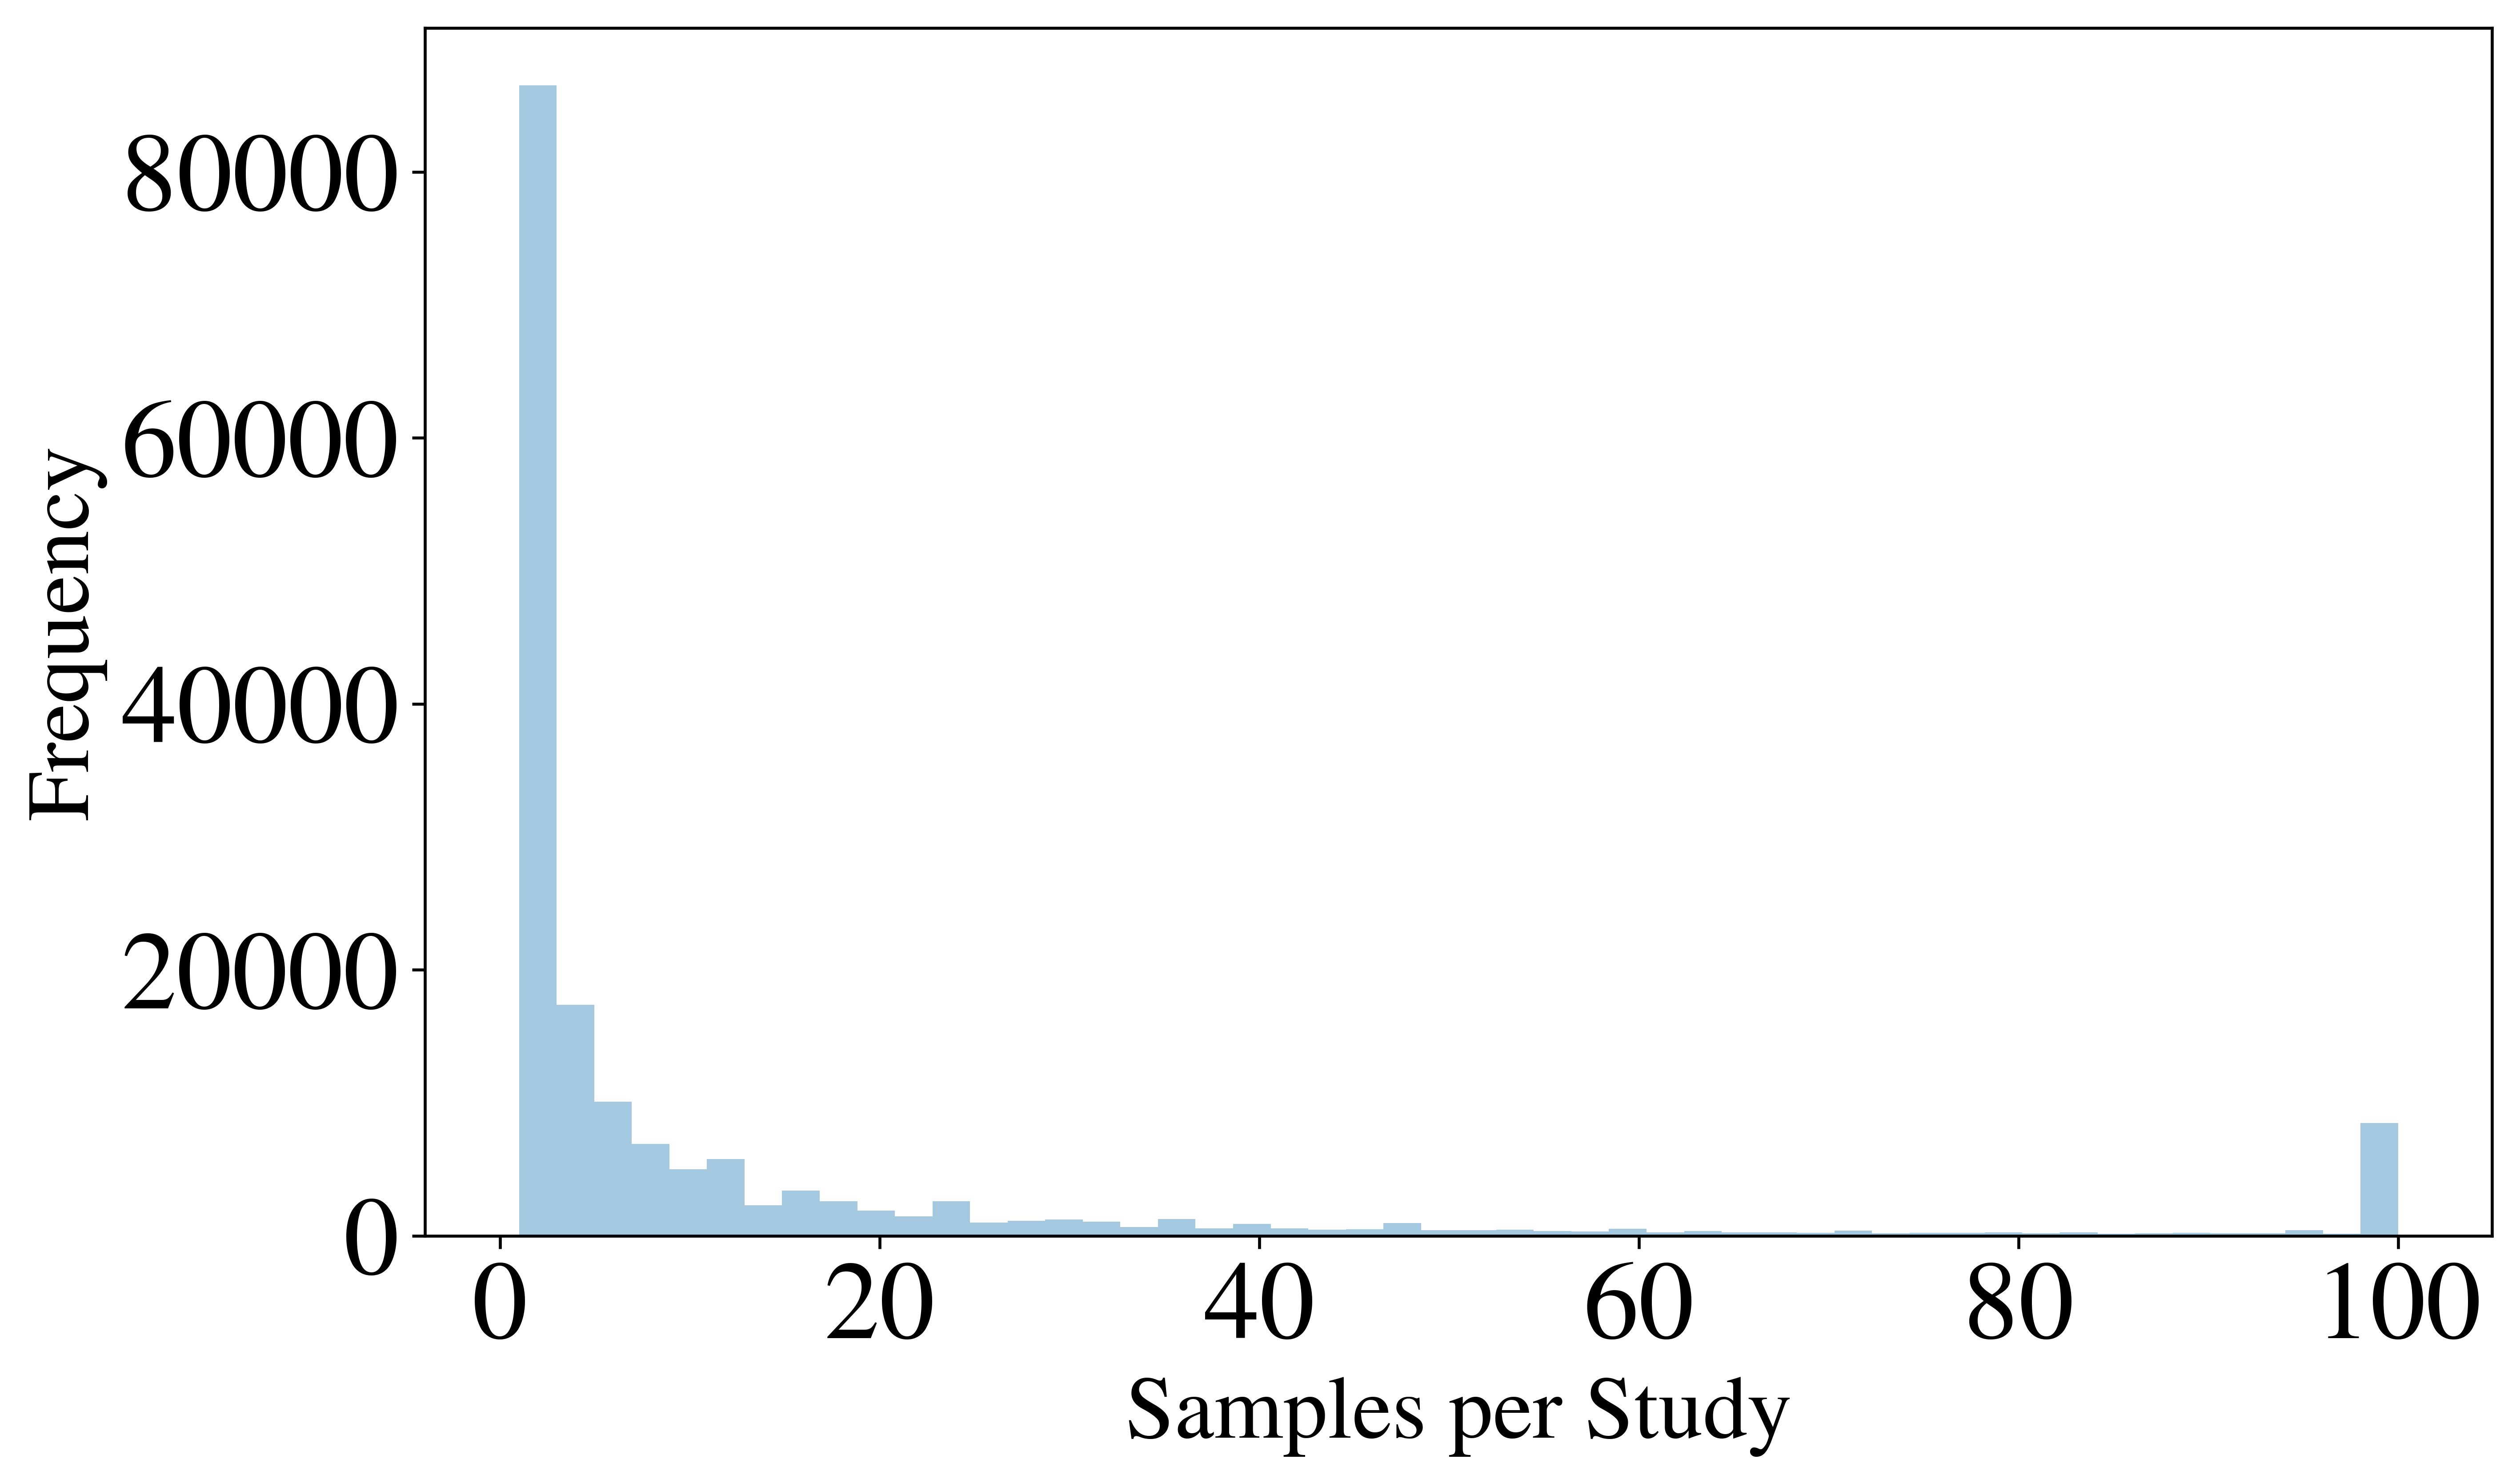

In [60]:
ax = sns.distplot(list(study_distr.values), kde=False)

ax.set_ylabel('Frequency', fontsize = 24)
ax.set_xlabel('Samples per Study', fontsize = 24)
plt.savefig('../doc/figures/Supplementary/Supp_Figure2B_new.eps', dpi=600, bbox_inches="tight")
plt.savefig('../doc/figures/Supplementary/Supp_Figure2B_new.png', dpi=600, bbox_inches="tight")
#plt.close();

In [10]:
capped_m = subset_SRS.index.get_level_values(0).isin(capped_samples.values)

In [11]:
subset_SRS = subset_SRS[capped_m]

#### Filter out unwanted training examples and replace all white space with ' '

In [12]:
filterTextL = ['not collected','not applicable','missing','n[/]?a','unknown', '-', '--', 'none', 'no']
filterTextRegex = "|".join(map(lambda myStr:'(?:{})'.format(myStr), filterTextL))

In [13]:
regex_m = subset_SRS.str.contains(filterTextRegex, case=False)

In [14]:
subset_SRS = subset_SRS[~regex_m]

#### Take only values between length 2 and 7

In [15]:
attribute_wc = subset_SRS.str.count(' ') + 1
wc_m = (attribute_wc >= 2) & (attribute_wc <= 7)

In [16]:
subset_SRS = subset_SRS[wc_m]

#### Filter out test set examples

In [17]:
with open('../results/validation/{model}/validation_SRSs.txt'.format(model=model_iter), 'r') as f:
    test_srs = [line.rstrip('\n') for line in f.readlines()]

In [18]:
test_m = ~subset_SRS.index.get_level_values(0).isin(test_srs)

In [19]:
subset_SRS = subset_SRS[test_m]

#### Replace whitespace with ' '

In [20]:
subset_SRS = subset_SRS.str.replace('\s+', ' ')

#### Final dataset

In [22]:
subset_df = pd.DataFrame(subset_SRS).reset_index()
subset_df.columns = ['srs', 'attribute', 'value']

In [23]:
subset_df['original_attribute'] = subset_df['attribute']
AttribToGroupNameS = grouping_df.groupby('attribute')['GroupName'].first()
subset_df['attribute'] = AttribToGroupNameS[subset_df['original_attribute'].values].values

In [24]:
subset_df.head()

,srs,attribute,value,original_attribute
0,SRS1024493,Species,Camellia oleifera,SCIENTIFIC_NAME
1,SRS568274,Species,Homo sapiens,nat-host
2,ERS1412828,Species,Pundamilia nyererei,SCIENTIFIC_NAME
3,SRS1219231,Species,Salmonella enterica subsp. enterica,SCIENTIFIC_NAME
4,SRS1219231,Species,Homo sapiens,host


### Train/val split

#### Start by pulling out only samples that are in our dataset from technical metadata, that has studies in it

In [25]:
valid_srs_m = allSRS.index.get_level_values(0).unique()
technical_meta_data_df_sub = technical_meta_data_df[technical_meta_data_df.Sample.isin(valid_srs_m)]

#### Get unique studies

In [26]:
study_s = technical_meta_data_df_sub['Study'].drop_duplicates()  # Get unique studies that can be found in allSRS
num_studies = len(study_s)

#### Select studies to use to train and validate

In [27]:
train_test_ratio = 0.8
train_n = int(num_studies * train_test_ratio)  # Number of training studies
train_studies = study_s.sample(n = train_n, random_state = 0).values  # pick those training studies randomly

In [28]:
# Label these studies with a column
technical_meta_data_df_sub['Train'] = technical_meta_data_df_sub['Study'].isin(train_studies).values  

/cellar/users/aklie/miniconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
# Get the ids for the training and test samples
train_mask = technical_meta_data_df_sub['Train']
train_samples = technical_meta_data_df_sub['Sample'][train_mask].values  # IDs for training set
val_samples = technical_meta_data_df_sub['Sample'][~train_mask].values  # IDs for test set

### Generate training and val dataframes

In [30]:
nDupTextMax = 1000
cap_size = 20000

#### Training set

In [31]:
train_df = subset_df[subset_df.srs.isin(train_samples)]

In [32]:
# Cap how many of a given entity we want to use
train_df = train_df.sample(train_df.shape[0])
dedup_train_df = train_df.groupby(['value']).head(n = nDupTextMax)
dedup_train_df['value'].value_counts().head()

Oncorhynchus mykiss    1000
whole animal           1000
whole organism         1000
Danio rerio            1000
synthetic construct    1000
Name: value, dtype: int64

In [33]:
# Balance the classes with class cap
final_train_df = dedup_train_df.sample(dedup_train_df.shape[0]).groupby('attribute').head(n = cap_size)

In [34]:
print("The number of training examples is %d" % (final_train_df.shape[0]))
train_counts = final_train_df.attribute.value_counts()
display(train_counts)

The number of training examples is 133627


Cell type            20000
Tissue               20000
Age                  20000
Strain               20000
Species              20000
Genotype             14930
Platform              7467
Condition/Disease     5295
Data type             3254
Sex                   2046
Protocol               635
Name: attribute, dtype: int64

#### Validation set

In [35]:
val_df = subset_df[subset_df.srs.isin(val_samples)]

In [36]:
val_df = val_df.sample(val_df.shape[0])
val_df = subset_df[subset_df.srs.isin(val_samples)]
dedup_val_df = val_df.groupby(['value']).head(n = nDupTextMax)

In [37]:
final_val_df = dedup_val_df.sample(dedup_val_df.shape[0]).groupby('attribute').head(n = cap_size)

In [38]:
val_counts = final_val_df.attribute.value_counts()
display(val_counts)

Cell type            20000
Tissue               20000
Species              20000
Age                   9292
Strain                7908
Genotype              4747
Platform              1590
Data type             1543
Condition/Disease     1540
Sex                    853
Protocol               178
Name: attribute, dtype: int64

In [39]:
# Actual training and test split
final_train_df.shape[0]/(final_train_df.shape[0] + final_val_df.shape[0])

0.603887417637542

In [40]:
final_train_df.to_pickle('../results/training/{model}/training_examples.pickle'.format(model = model_iter))
final_val_df.to_pickle('../results/training/{model}/test_examples.pickle'.format(model = model_iter))

### <font color=red>Supp. Figure 2A</font> Class balance

In [41]:
counts_df = pd.concat([pd.DataFrame(train_counts), pd.DataFrame(val_counts)], axis=1)
counts_df.to_csv('../doc/figures/Supplementary/Supp_Figure2A.csv')

/cellar/users/aklie/miniconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Train the model

### Model set-up

In [42]:
nr_hidden = 64 
max_length = 7 # 95% percentile of training phrase length from NCIT
dropout = 0.5
learn_rate = 0.001 # General NN config
nb_epoch = 1
batch_size = 100

In [43]:
classNames = AttribToGroupNameS.unique()
classNames

array(['Sex', 'Age', 'Cell type', 'Genotype', 'Species', 'Platform',
       'Strain', 'Protocol', 'Condition/Disease', 'Data type', 'Tissue'],
      dtype=object)

In [44]:
le = preprocessing.LabelEncoder()
le.fit(classNames)
nr_classes=len(le.classes_)

In [45]:
lstm_shape={'nr_hidden': 64, 'max_length': max_length, 'nr_class': nr_classes}
lstm_settings={'dropout': 0.5, 'lr': 0.001}

In [46]:
embeddings = nlp.vocab.vectors.data

In [47]:
train_texts = final_train_df.value.tolist()
dev_texts = final_val_df.value.tolist()

train_labels = keras.utils.to_categorical(le.transform(final_train_df.attribute.values))
dev_labels = keras.utils.to_categorical(le.transform(final_val_df.attribute.values))

train_docs = list(tqdm(nlp.pipe(train_texts,n_threads=32),total=len(train_texts)))
dev_docs = list(tqdm(nlp.pipe(dev_texts,n_threads=32),total=len(dev_texts)))

train_X = get_features(train_docs, lstm_shape['max_length'])
dev_X = get_features(dev_docs, lstm_shape['max_length'])

100%|██████████| 87651/87651 [00:00<00:00, 137156.59it/s]


In [48]:
np.save('../results/training/{model}/classes.npy'.format(model = model_iter), le.classes_)

In [49]:
model = compile_lstm(embeddings, lstm_shape, lstm_settings)

In [50]:
from contextlib import redirect_stdout

with open('../results/training/11_class/model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [51]:
%%capture keras_stdout
lstm = model.fit(train_X, train_labels, validation_data = (dev_X, dev_labels),
          nb_epoch = nb_epoch, verbose = 1, batch_size = batch_size)

In [52]:
import datetime
x = datetime.datetime.now()
today = x.strftime("%Y_%m_%d")
today

'2020_07_09'

In [53]:
lstm.model.save('../models/{model}_{date}.h5'.format(model = model_iter, date=today))

In [54]:
keras_stdout_str = keras_stdout.stdout
textfile = open('../results/training/{model}/keras_out.txt'.format(model = model_iter), 'w')
textfile.write(keras_stdout_str)
textfile.close()